### Efficient Frontier

In [27]:
import pandas as pd
import numpy as np

In [28]:
ind=pd.read_csv("data/ind30_m_vw_rets.csv",
                header=0,index_col=0,parse_dates=True)/100

/tmp/ipykernel_4859/203694640.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind=pd.read_csv("data/ind30_m_vw_rets.csv",


In [29]:
ind.index = ind.index.astype(str)
ind.index=pd.to_datetime(ind.index,format="%Y%m").to_period('M')

In [30]:
ind.columns=ind.columns.str.strip()

In [31]:
import risk_kit as rk
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
ind=rk.get_ind_returns()
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


<AxesSubplot: >

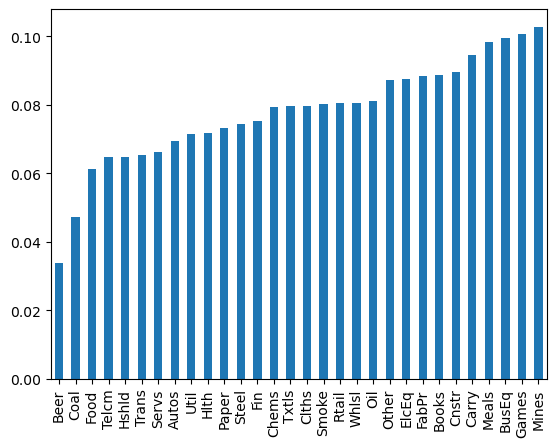

In [33]:
rk.var_gaussian(ind,modified=True).sort_values().plot.bar()

<AxesSubplot: title={'center': 'Industry sharpe ration from 1926-2018'}>

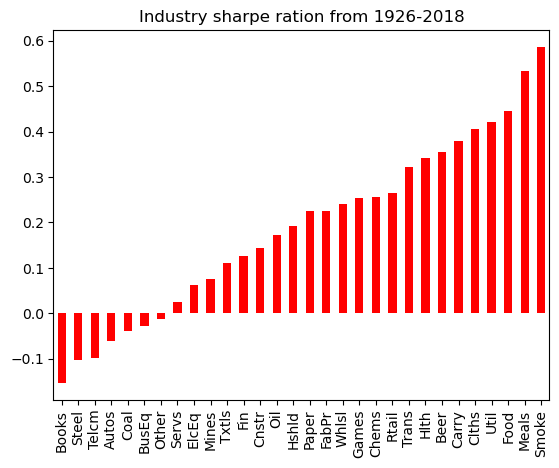

In [34]:
rk.sharpe_ratio(ind["2000":],0.03,12).sort_values().plot.bar(title="Industry sharpe ration from 1926-2018",color="red")

### Efficient frontier part II

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk

ind=rk.get_ind_returns()
er=rk.annualize_rets(ind["1996":"2000"],12)
cov=ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def portfolio_return(weights,returns):
    """ 
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights,covmat):
    """ 
    weights -> vol
    """
    return (weights.T @ covmat @ weights)**0.5


In [37]:
l=["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [38]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [39]:
import numpy as np
weights=np.repeat(1/4,4)

In [40]:
rk.portfolio_return(weights,er[l])

0.1951109719603839

In [41]:
rk.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

In [42]:
l=["Games","Fin"]

In [43]:
n_points=20
weights=[np.array([w,1-w]) for w in np.linspace(0,1,n_points)]

In [44]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<AxesSubplot: xlabel='Vol', ylabel='R'>

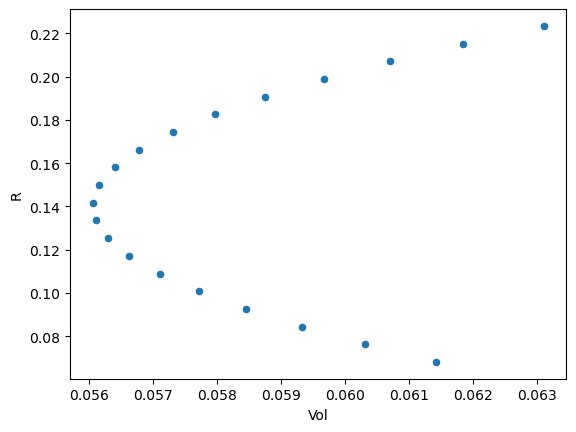

In [45]:
rets=[rk.portfolio_return(w,er[l]) for w in weights]
vols=[rk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef=pd.DataFrame({"R":rets,"Vol":vols})
ef.plot.scatter(x="Vol",y="R")


<AxesSubplot: xlabel='Volatility'>

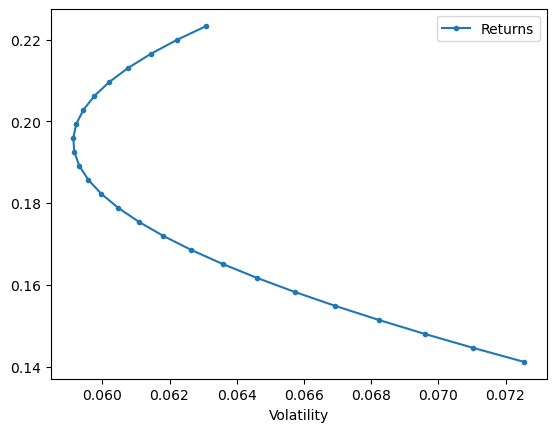

In [46]:
l=["Fin","Beer"]
rk.plot_ef2(25,er[l],cov.loc[l,l])

### N Asset efficient frontier


In [ ]:
def plot_ef(n_points,er,cov):
    """ 
    Plots the N-asset efficient frontier
    """
    weights=
    rets=[portfolio_return(w,er)for w in weights]
    vols=[portfolio_vol(w,cov) for w in weights]
    ef=pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility",y="Returns",style=".-")

In [47]:
from scipy.optimize import minimize

In [50]:
def minimize_vol(target_returns,er,cov):
    """ 
    target_ret->W
    """
    n=er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    return_is_target = {
        'type':'eq',
        'args':(er,),
        'fun': lambda weights,er: target_returns-rk.portfolio_return(weights,er)
    } 
    weights_sum_to_1={
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1


    }
    results=minimize(rk.portfolio_vol,init_guess,args=(cov,),method="SLSQP",
                     options={'disp':False},
                     constraints=(return_is_target,weights_sum_to_1),
                     bounds=bounds
                     )
    return results.x

In [52]:
w15=minimize_vol(0.15,er[l],cov.loc[l,l])
vol15 = rk.portfolio_vol(w15,cov.loc[l,l])

In [53]:
vol15

0.05616366940670658

In [54]:
w15

array([0.47287631, 0.52712369])

In [55]:
w15=rk.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15=rk.portfolio_vol(w15,cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [56]:
vol15

0.05616366940670658

In [60]:
def optimal_weights(n_points,er,cov):
    """ 
    -> list of weights to run the optimizer on to minimize the volatility
    """
    target_rs=np.linspace(er.min(),er.max(),n_points)
    weights=[minimize_vol(target_return,er,cov) for target_return in target_rs]
    return weights
def plot_ef(n_points,er,cov):
    """ 
    Plots the 2-asset efficient frontier
    """
    weights=optimal_weights(n_points,er,cov)
    rets=[portfolio_return(w,er)for w in weights]
    vols=[portfolio_vol(w,cov) for w in weights]
    ef=pd.DataFrame({
        "Returns":rets,
        "Volatility":vols
    })
    return ef.plot.line(x="Volatility",y="Returns",style=".-")

<AxesSubplot: xlabel='Volatility'>

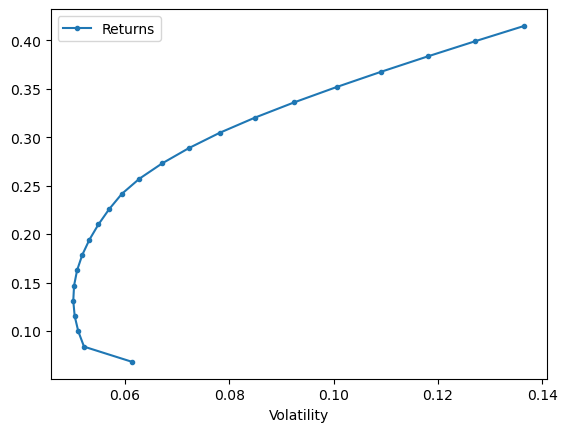

In [62]:
l=["Smoke","Fin","Games","Coal"]
rk.plot_ef(23,er[l],cov.loc[l,l])